In [3]:
!pip install yahoo_fin #Install Yahoo finance 

In [4]:
!pip install yfinance

In [28]:
import yfinance as fy             #import yfinance for taking data from yahoo finance
import matplotlib.pyplot as plot  #Import matplotlib for importing visulizations tools
import numpy as np                #Import numpy for calculating functions

In [29]:
from yahoo_fin.stock_info import get_data    #Use get_data method for importing data from url. 

In [154]:
#For getting high values from data we create visulizedDataHigh function which take company name as input.

def visulizedDataHigh(company,code):
    fig, ax = plot.subplots(figsize= (12,6))                                  #use this for size of graph
    code['high'].plot(kind='bar',label="Highest price", color='blue')   #use plot function to draw bar graph
    
    #Now importing title, xlabel and ylabel.
    ax.set_title(f'Monthly Transaction Count of {company} in last 2 years')                            
    ax.set_xlabel('Month')
    ax.set_ylabel('Market price')
    ax.legend()

#Use for loop for separating highest company's stock price in last 2 years.

    for i, val in enumerate(code['high']):
        if val == max(code['high']):
            ax.bar(i, val,label="highest Stock Price", color='red')    #Separate color for highest price
            ax.legend()
        else:
            ax.bar(i, val, color='blue')                               #Separate color except highest price   
            ax.legend()

In [160]:
#Now create function for the lowest stock price of company among all years.

def visulizedDataLow(company,code):
    fig, ax = plot.subplots(figsize= (12,6))
    code['low'].plot(kind='bar',label="Stock Price",color='blue')
    ax.set_title(f'Monthly Transaction Count of {company} in last 2 years')
    ax.set_xlabel('Month')
    ax.set_ylabel('Market price')
    ax.legend()


#Use for loop for separating lowest panasonic stock price in last 2 years.
    for i, val in enumerate(code['low']):
        if val == min(code['low']):
            ax.bar(i, val,label="lowest Stock Price", color='#E3CF57')     #Separate color for highest price
            ax.legend()
        else:
            ax.bar(i, val, color='blue')                                   #Separate color except highest price    
            ax.legend()

In [238]:
#For getting correlation between volume and close price

import seaborn as sns

def findCorr(company_name,code):
    corr_matrix = code.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Correlation between volume and close price of {company_name}")
    corr = code['volume'].corr(code['close'])

    print(f'The correlation coefficient between volume and close is {corr:.2f}.')

In [189]:
#Transactions history
def transactionsHistory(company_name,code):

    #Set graph size here
    fig, ax = plot.subplots(figsize= (8,4))
    #plot line graph with marker with red color.
    ax.plot(code['open'], color='red', linewidth = 2)
    plt.title(f'Monthly Transaction Count of {company_name}')
    plt.xlabel('Month')
    plt.ylabel('Transaction Count')
    plt.show()

    # Find the month with the most and least transactions
    most_transactions_month =  code['open'].idxmax().strftime('%B, %Y')
    least_transactions_month =  code['open'].idxmin().strftime('%B, %Y')

In [192]:
#Plot correlation between close price and open price


def openClose(company_name,code):
    # Plotting a line plot of opening and closing prices
    plt.figure(figsize=(8,4))
    plt.plot(code['open'], label='Open',color = 'blue')
    plt.plot(code['close'], label='Close', color = 'red')
    plt.title(f'Opening and Closing Prices for {company_name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Calculate the correlation coefficient between opening and closing prices
    corr = code['open'].corr(code['close'])

    print(f'The correlation coefficient between opening and closing prices is {corr:.2f}.')



## 1) Panasonic Holdings Corporation (PCRFY)

In [138]:
#Input Panasonic Holdings Corporation Data set from yahoo_fin.stock_info

PCRFY = get_data("PCRFY",start_date = "20/09/2021",end_date="20/09/2023",
                 index_as_date = True, interval="1mo")

C:\Users\win\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: UserWarning: Parsing '20/09/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\win\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: UserWarning: Parsing '20/09/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [274]:
# For getting top 5 row we use head function. 
PCRFY.head()

,open,high,low,close,adjclose,volume,ticker
2021-10-01,12.37,13.66,11.20,12.41,12.41,8106100,PCRFY
2021-11-01,12.36,12.88,10.76,10.90,10.90,8551500,PCRFY
2021-12-01,10.89,11.59,10.50,10.99,10.99,8005700,PCRFY
2022-01-01,10.99,11.80,10.55,11.02,11.02,6105400,PCRFY
2022-02-01,11.37,11.37,9.91,10.51,10.51,5856900,PCRFY


In [148]:
#Retriving data of Panasonic.
Panasonic_weekly = get_data("PCRFY",start_date = "20/09/2021",end_date="20/09/2023",index_as_date = True, interval="1wk")

C:\Users\win\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: UserWarning: Parsing '20/09/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\win\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: UserWarning: Parsing '20/09/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [149]:
# Sort high and low price in ascending order. 
panasonic_high = PCRFY.sort_values(by='high', ascending=False)

In [150]:
print(panasonic_high.head(3)) #Print top 3 high values of Panasonic Stock

#Now Print highest value among all data with date. 
print( "Highest price for arbor is: ",panasonic_high.high[0], "on",panasonic_high['high'].idxmax().strftime('%B, %Y'))


             open   high    low  close  adjclose   volume ticker
2021-10-01  12.37  13.66  11.20  12.41     12.41  8106100  PCRFY
2021-11-01  12.36  12.88  10.76  10.90     10.90  8551500  PCRFY
2023-07-01  12.30  12.75  11.69  12.33     12.33  3170700  PCRFY
Highest price for arbor is:  13.65999984741211 on October, 2021


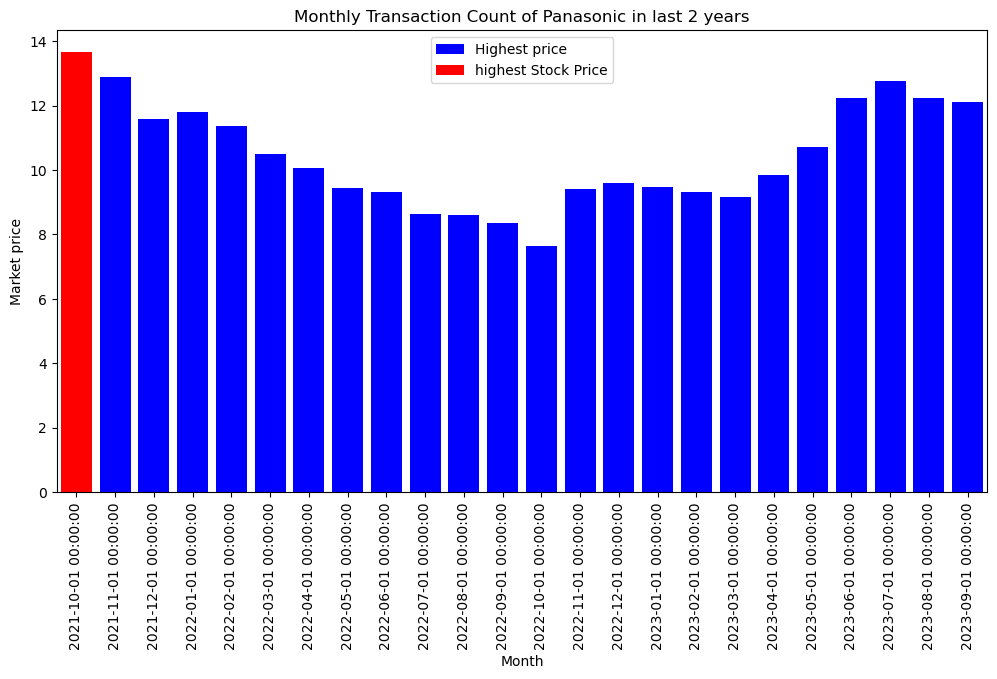

In [271]:
#Visulization of highest price in Panasonic company in last 2 years
visulizedDataHigh('Panasonic',PCRFY)

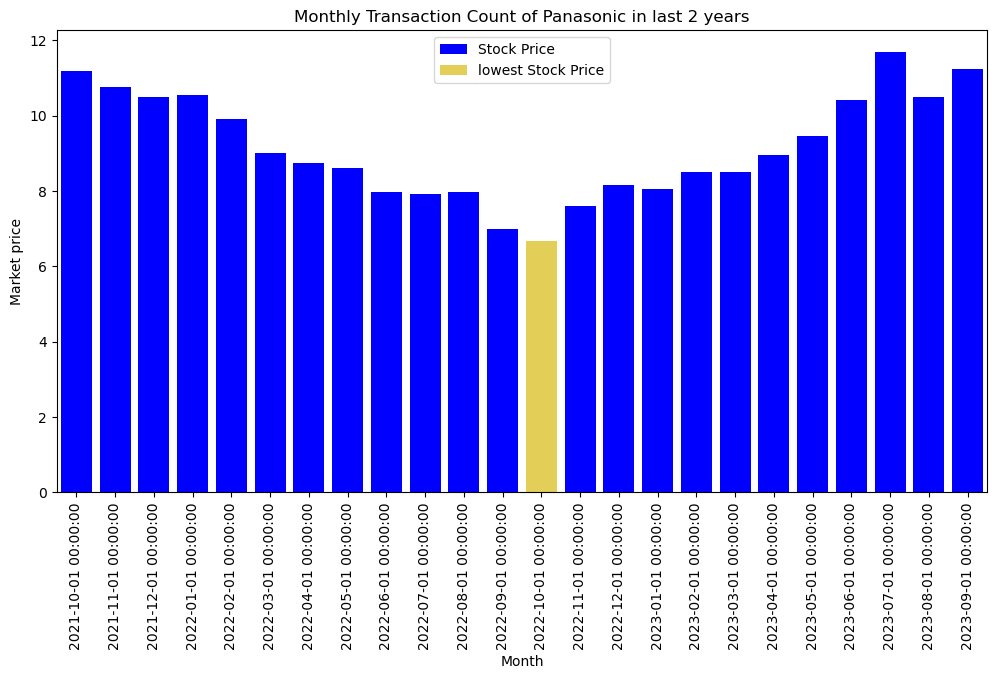

In [161]:
#Visulization of lowest price in Panasonic company in last 2 years
visulizedDataLow('Panasonic',PCRFY)

The correlation coefficient between volume and close is -0.15.


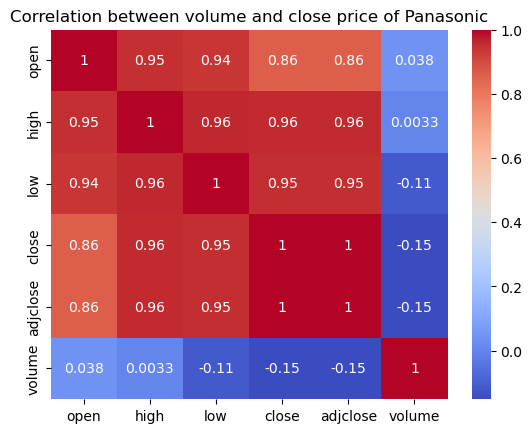

In [239]:
#To find correaltion between volume and close price, we used findcorr function. 
findCorr('Panasonic',PCRFY)

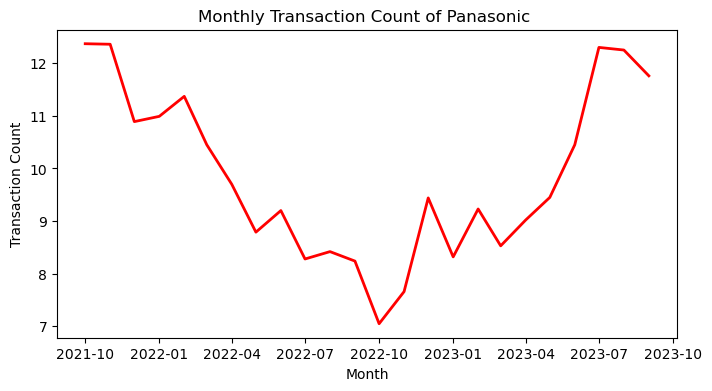

In [191]:
#Transaction History of Panasonic 
transactionsHistory('Panasonic',PCRFY)

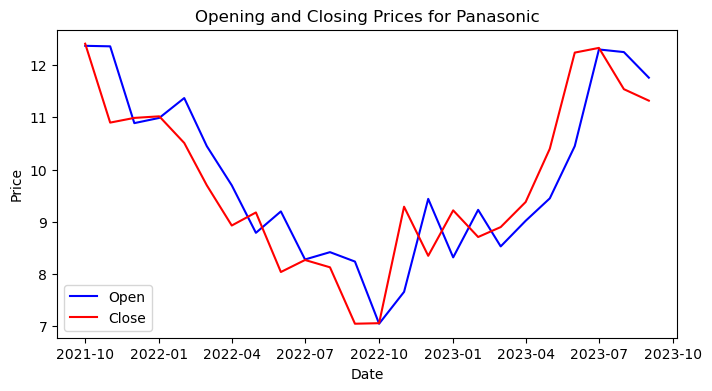

The correlation coefficient between opening and closing prices is 0.86.


In [193]:
#plot correlation line graph between closing and opening price
openClose('Panasonic',PCRFY)

# 2) Arbor Metals Corp. (ABR.V)

In [195]:
#Input Arbor Metals Corporation Data set from yahoo_fin.stock_info

ABR = get_data("ABR.V",start_date = "20/09/2021",end_date="20/09/2023",index_as_date = True, interval="1mo")

C:\Users\win\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: UserWarning: Parsing '20/09/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\win\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: UserWarning: Parsing '20/09/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [196]:
#Get head of Arbor Metals Corp. stock data. 
ABR.head()

,open,high,low,close,adjclose,volume,ticker
2021-10-01,2.05,2.32,1.99,2.31,2.31,538600,ABR.V
2021-11-01,2.31,2.78,2.22,2.30,2.30,1844000,ABR.V
2021-12-01,2.41,2.75,2.41,2.61,2.61,479900,ABR.V
2022-01-01,2.62,2.79,2.10,2.51,2.51,1069900,ABR.V
2022-02-01,2.51,2.85,2.17,2.44,2.44,306900,ABR.V


In [197]:
# sort by Ascending order. for getting high price from the data
arbor_high = ABR.sort_values(by='high', ascending=False)

In [199]:
print(arbor_high.head())
print( "Highest price for arbor is: ",arbor_high.high[0])

            open  high   low  close  adjclose    volume ticker
2023-08-01  3.31  3.69  3.03   3.05      3.05  14570500  ABR.V
2023-07-01  3.32  3.42  3.26   3.30      3.30  14353800  ABR.V
2023-05-01  3.38  3.38  2.97   2.97      2.97   2331800  ABR.V
2023-04-01  3.19  3.33  2.51   3.22      3.22   1332600  ABR.V
2023-03-01  3.11  3.30  3.01   3.16      3.16   1697400  ABR.V
Highest price for arbor is:  3.690000057220459


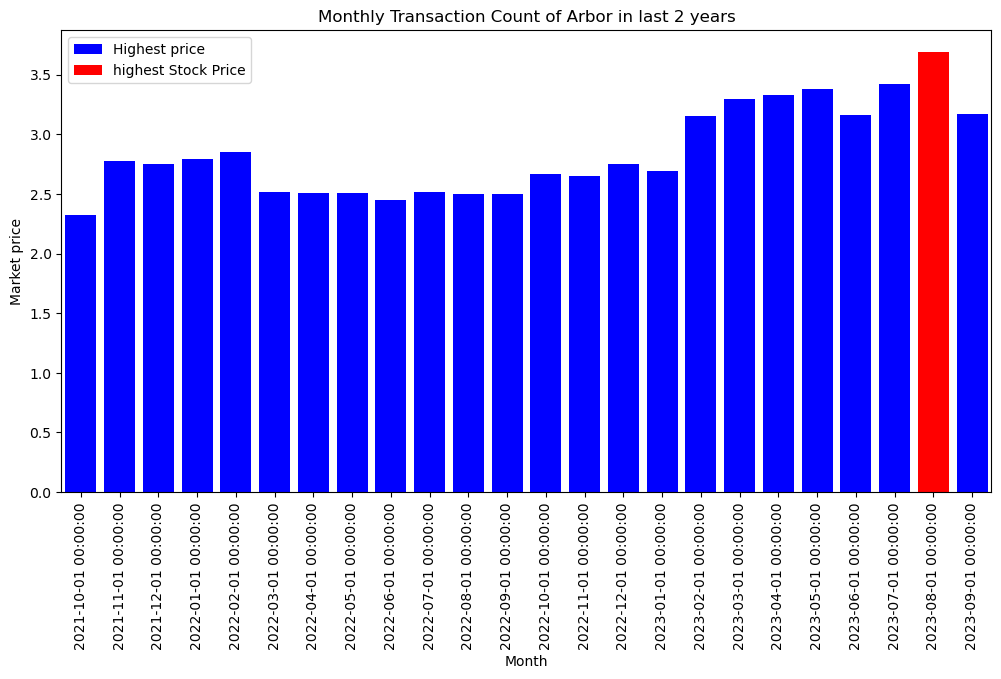

In [204]:
#use functions for getting highest price of company
visulizedDataHigh('Arbor',ABR)

In [203]:
#Getting lowest price from stock data.
arbor_low = ABR.sort_values(by='high', ascending=False)
print(arbor_low.tail())
print( "Lowest price for arbor is: ",arbor_low.low[-1])

            open  high   low  close  adjclose  volume ticker
2022-04-01  2.46  2.51  2.42   2.42      2.42  327900  ABR.V
2022-09-01  2.49  2.50  2.40   2.42      2.42  271800  ABR.V
2022-08-01  2.40  2.50  2.40   2.50      2.50  188500  ABR.V
2022-06-01  2.39  2.45  2.24   2.45      2.45  203200  ABR.V
2021-10-01  2.05  2.32  1.99   2.31      2.31  538600  ABR.V
Lowest price for arbor is:  1.9900000095367432


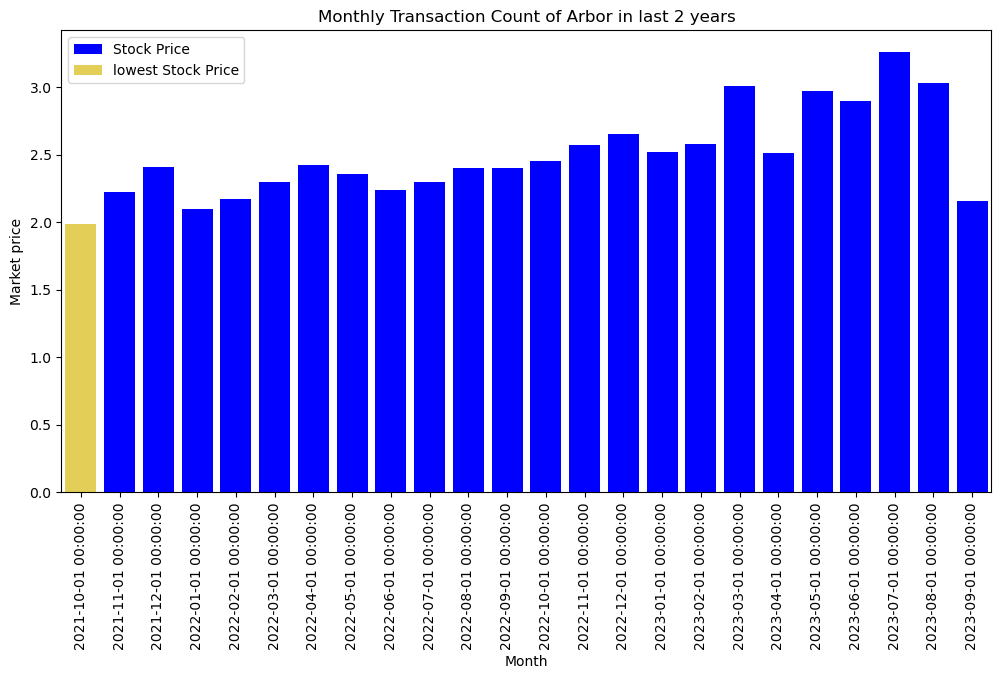

In [205]:
#use functions for getting lowest price of company
visulizedDataLow('Arbor',ABR)

The correlation coefficient between volume and close is 0.33.


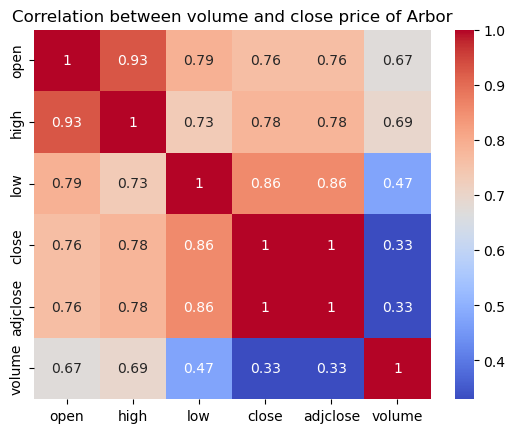

In [240]:
# Correlation matrix between volue and close price. 
findCorr('Arbor',ABR)

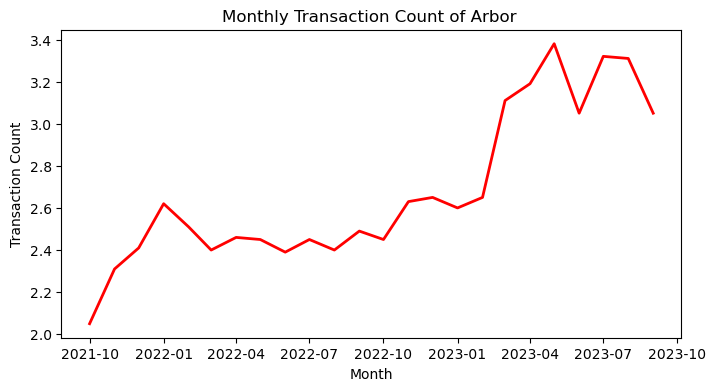

In [241]:
#Transaction History of Arbor company. 
transactionsHistory('Arbor',ABR)

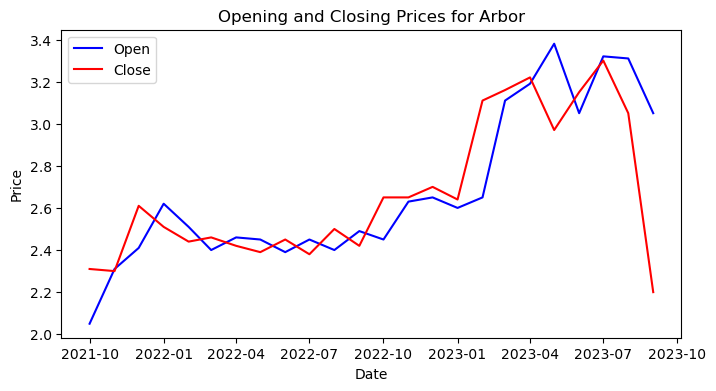

The correlation coefficient between opening and closing prices is 0.76.


In [242]:
# Correlation between open and close price. 
openClose('Arbor',ABR)

## Solid Power, Inc. (SLDP)

In [214]:
#Input SPI Data set from yahoo_fin.stock_info

SLDP = get_data("SLDP",start_date = "20/09/2021",end_date="20/09/2023",index_as_date = True, interval="1mo")

C:\Users\win\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: UserWarning: Parsing '20/09/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\win\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: UserWarning: Parsing '20/09/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [215]:
#use head function for getting top data from data set. 
SLDP.head()

,open,high,low,close,adjclose,volume,ticker
2021-10-01,10.11,12.40,9.980,12.21,12.21,29918400,SLDP
2021-11-01,13.07,14.48,10.950,11.89,11.89,64703900,SLDP
2021-12-01,12.09,14.85,8.640,8.74,8.74,69308400,SLDP
2022-01-01,8.93,9.20,5.610,6.67,6.67,47721500,SLDP
2022-02-01,6.75,8.57,5.927,7.95,7.95,24315500,SLDP


In [216]:
# Sort data in acending order and print the highest price of data. 
SLDP_high = SLDP.sort_values(by='high', ascending=False)
print(SLDP_high.head())
print( "Highest price for arbor is: ",SLDP_high.high[0])

             open   high    low  close  adjclose    volume ticker
2021-12-01  12.09  14.85   8.64   8.74      8.74  69308400   SLDP
2021-11-01  13.07  14.48  10.95  11.89     11.89  64703900   SLDP
2021-10-01  10.11  12.40   9.98  12.21     12.21  29918400   SLDP
2022-04-01   8.74   9.99   7.77   8.12      8.12  22227000   SLDP
2022-03-01   7.90   9.88   6.64   8.67      8.67  46329500   SLDP
Highest price for arbor is:  14.850000381469727


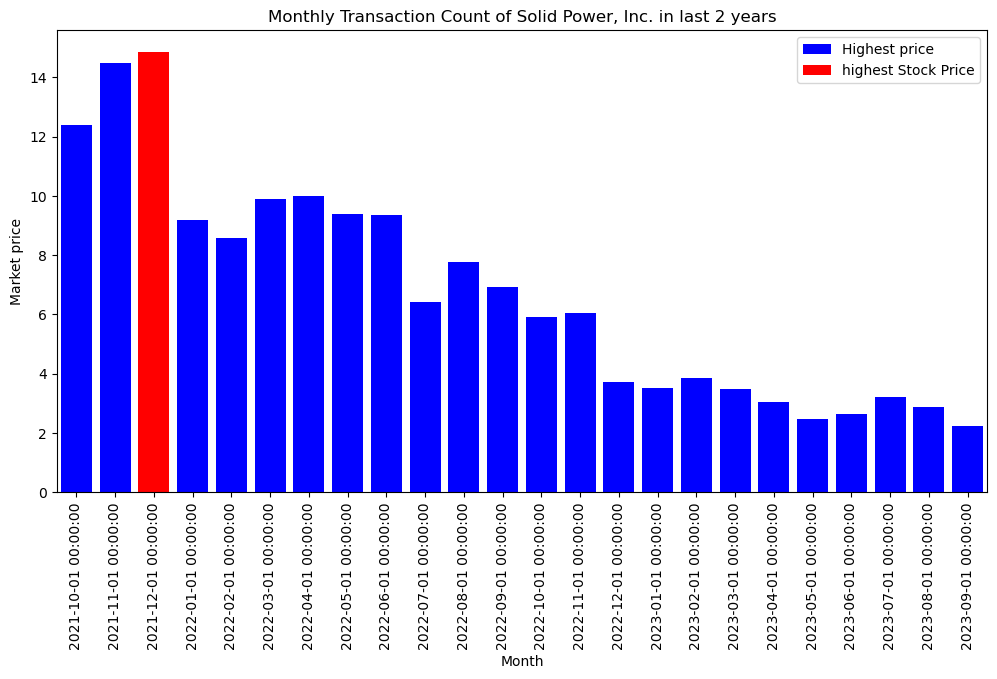

In [217]:
# Use visulizedDataHigh function for get the highest price from data. 
visulizedDataHigh('Solid Power, Inc.',SLDP)

In [212]:
SLDP_low = SLDP.sort_values(by='high', ascending=False)
print(SLDP_low.tail())
print( "Lowest price for arbor is: ",SLDP_low.low[-1])

            open  high   low  close  adjclose    volume ticker
2023-09-11  2.16  2.23  2.05   2.13      2.13   5393200   SLDP
2023-09-04  2.19  2.22  2.02   2.13      2.13   5132600   SLDP
2023-08-21  2.12  2.17  2.01   2.11      2.11   7038500   SLDP
2023-09-18  2.13  2.14  2.03   2.05      2.05   1612300   SLDP
2023-05-15  1.98  2.00  1.83   1.90      1.90  12820500   SLDP
Lowest price for arbor is:  1.8300000429153442


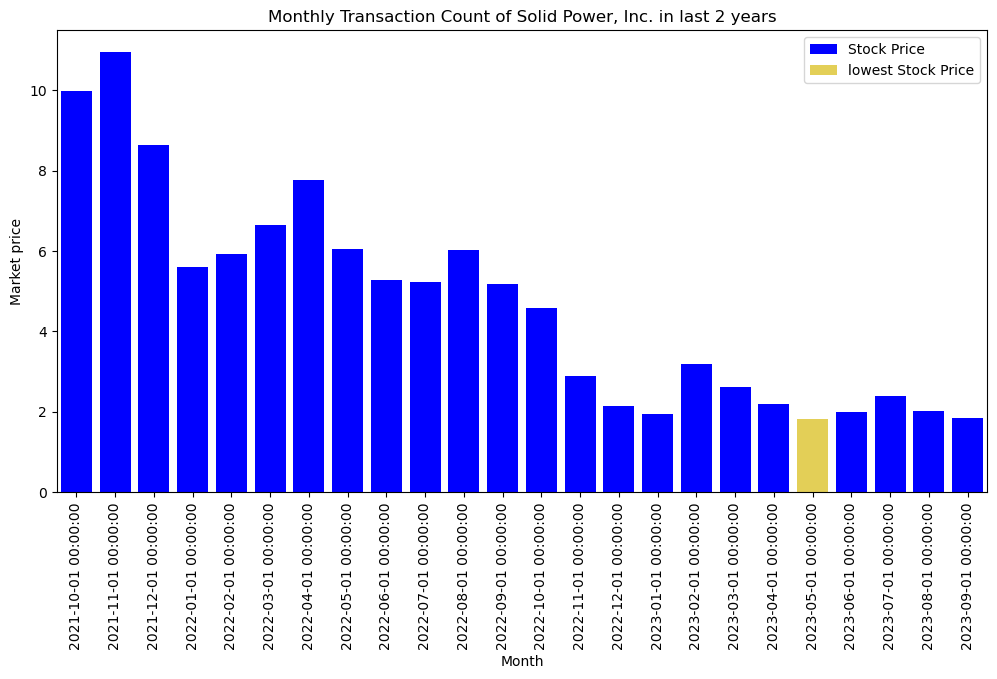

In [218]:
# Use visulizedDataLow function for get the highest price from data. 
visulizedDataLow('Solid Power, Inc.',SLDP)

The correlation coefficient between volume and close is -0.08.


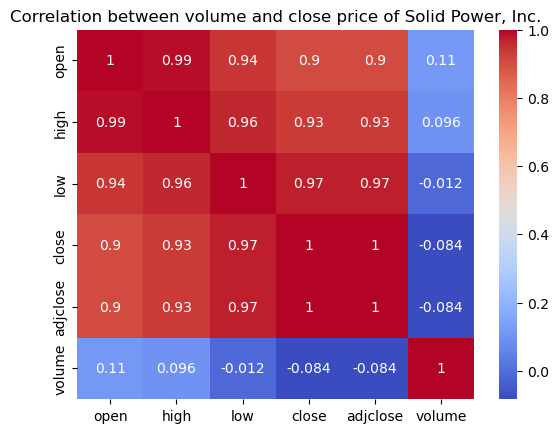

In [243]:
# Correlation between between voume and close price.
findCorr('Solid Power, Inc.',SLDP)

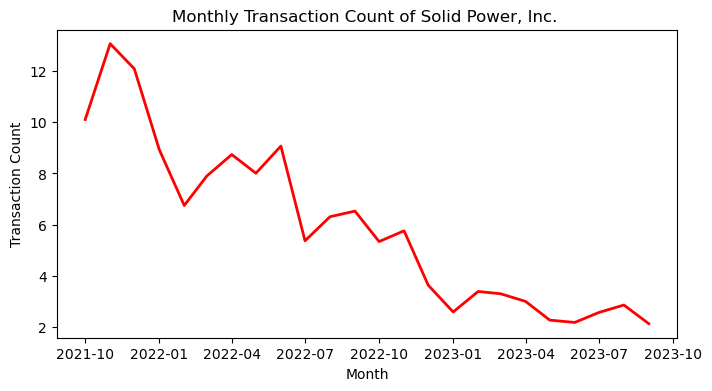

In [244]:
# get transactions History from data set. 
transactionsHistory('Solid Power, Inc.',SLDP)

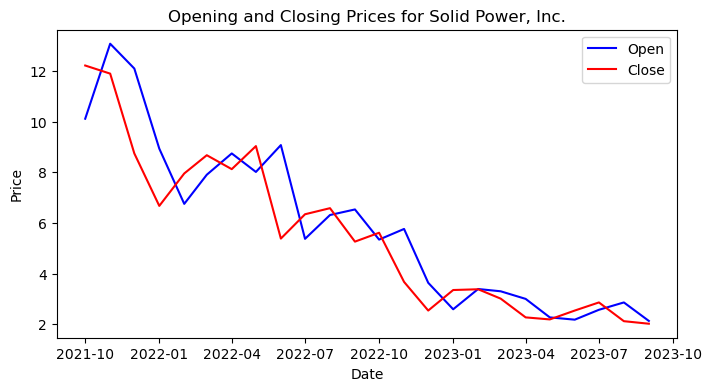

The correlation coefficient between opening and closing prices is 0.90.


In [245]:
# Correlation between between open and close price.
openClose('Solid Power, Inc.',SLDP)

# 4) Boyd Gaming Corporation (BYD)

In [246]:
#Input Boyd Gaming Corporation Data set from yahoo_fin.stock_info

BYD = get_data("BYD",start_date = "20/09/2021",end_date="20/09/2023",index_as_date = True, interval="1mo")

C:\Users\win\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: UserWarning: Parsing '20/09/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\win\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: UserWarning: Parsing '20/09/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [272]:
# Getting head of data BYD company but here we pass 4 which gives first 4 data. 
BYD.head(4)

,open,high,low,close,adjclose,volume,ticker
2021-10-01,64.099998,69.230003,63.200001,63.779999,62.610310,23070100,BYD
2021-11-01,64.120003,68.279999,57.860001,58.610001,57.535130,25045000,BYD
2021-12-01,59.700001,66.059998,56.450001,65.570000,64.367485,23251800,BYD
2022-01-01,65.959999,66.989998,54.599998,59.459999,58.369537,19970600,BYD


In [249]:
# get byd's highest price 
BYD_high = BYD.sort_values(by='high', ascending=False)
print(BYD_high.head())
print( "Highest price for arbor is: ",BYD_high.high[0])

                 open       high        low      close   adjclose    volume  \
2023-07-01  69.470001  73.000000  65.529999  68.320000  68.147934  15806100   
2022-02-01  60.009998  72.720001  59.450001  70.940002  69.639008  25565400   
2022-03-01  70.839996  72.000000  59.310001  65.779999  64.573624  29373600   
2023-05-01  69.949997  71.690002  63.220001  63.730000  63.422432  20442200   
2023-06-01  63.639999  70.040001  63.299999  69.370003  69.035217  16477000   

           ticker  
2023-07-01    BYD  
2022-02-01    BYD  
2022-03-01    BYD  
2023-05-01    BYD  
2023-06-01    BYD  
Highest price for arbor is:  73.0


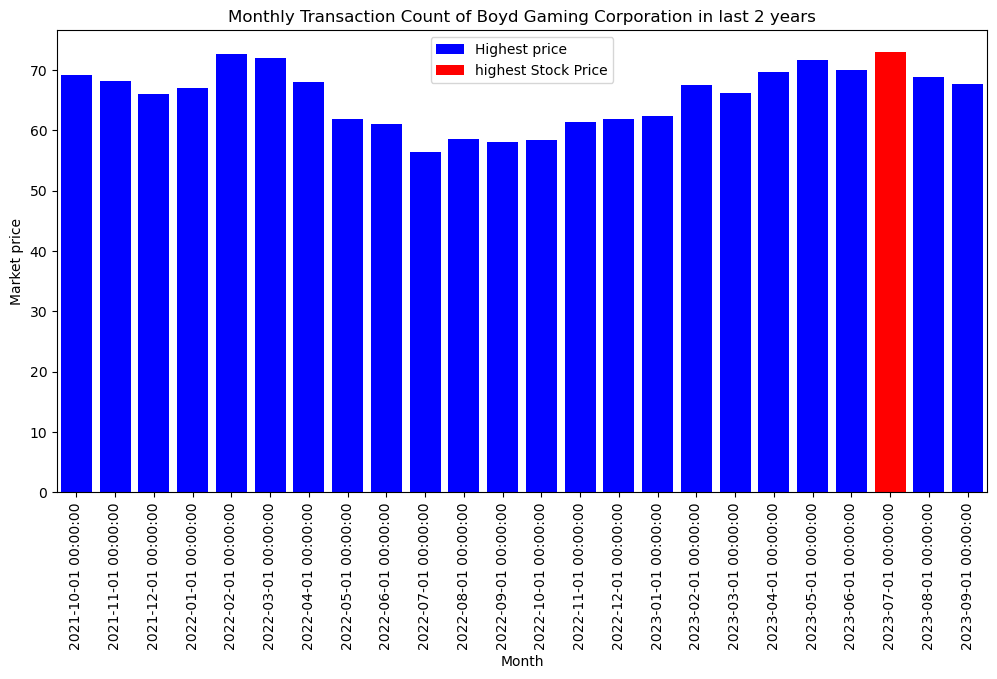

In [252]:
# Use visulizedDataLow function for get the highest price from data. 
visulizedDataHigh('Boyd Gaming Corporation',BYD)

In [250]:
BYD_low = BYD.sort_values(by='high', ascending=False)
print(BYD_low.tail())
print( "Lowest price for arbor is: ",BYD_low.low[-1])

                 open       high        low      close   adjclose    volume  \
2022-06-01  59.490002  61.150002  47.660000  49.750000  48.951954  27327500   
2022-08-01  54.880001  58.599998  53.619999  54.430000  53.712357  20711800   
2022-10-01  48.310001  58.470001  47.549999  57.759998  57.176201  18410100   
2022-09-01  53.840000  58.130001  46.099998  47.650002  47.021751  25476200   
2022-07-01  49.570000  56.389999  48.020000  55.509998  54.778122  18967100   

           ticker  
2022-06-01    BYD  
2022-08-01    BYD  
2022-10-01    BYD  
2022-09-01    BYD  
2022-07-01    BYD  
Lowest price for arbor is:  48.02000045776367


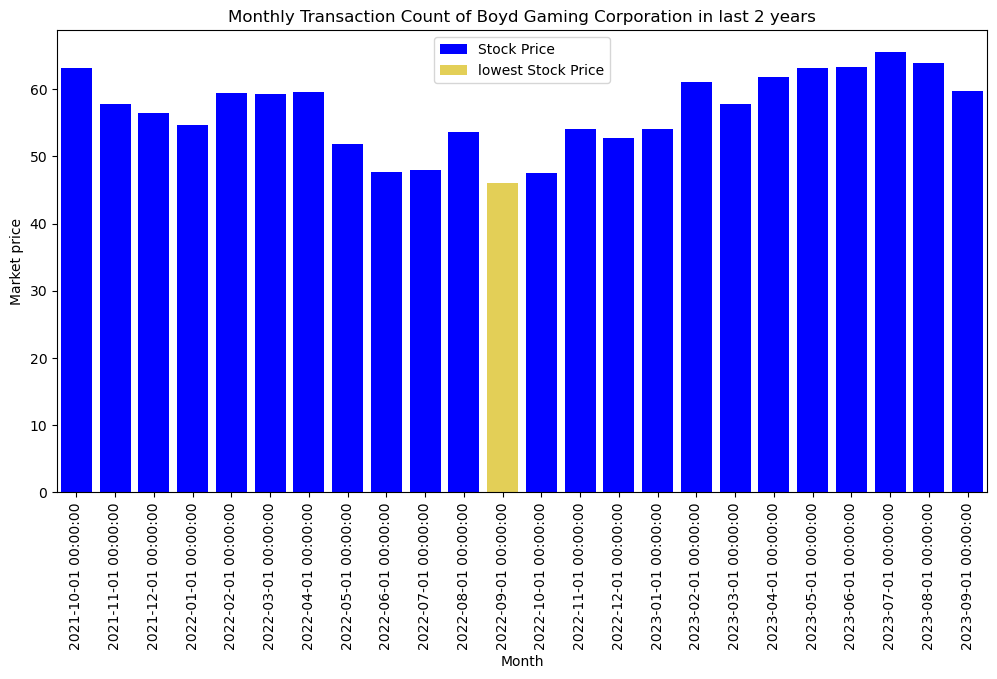

In [253]:
# Use visulizedDataLow function for get the lowest price from data. 
visulizedDataLow('Boyd Gaming Corporation',BYD)

The correlation coefficient between volume and close is -0.31.


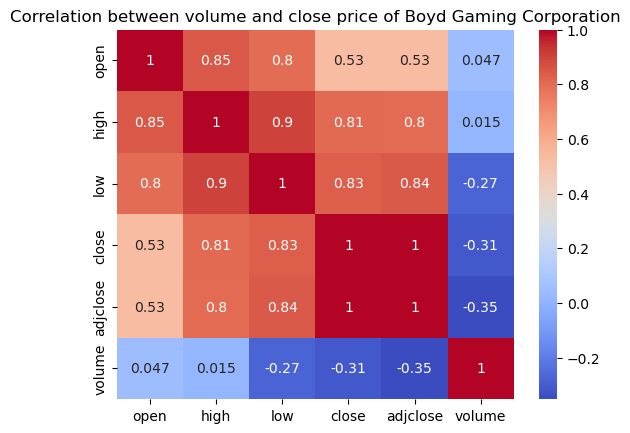

In [254]:
# Correlation between between voume and close price.
findCorr('Boyd Gaming Corporation',BYD)

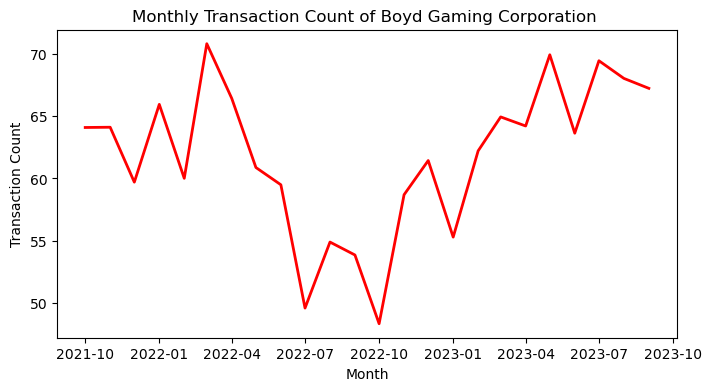

In [255]:
# get transactions History from data set. 
transactionsHistory('Boyd Gaming Corporation',BYD)

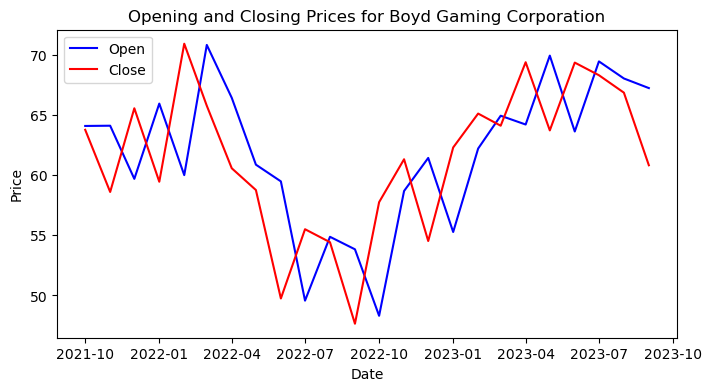

The correlation coefficient between opening and closing prices is 0.53.


In [256]:
# Correlation between between open and close price.
openClose('Boyd Gaming Corporation',BYD)

# 5) Microvast Holdings, Inc. (MVST)

In [257]:
#Input Microvast Holdings, Inc Data set from yahoo_fin.stock_info

MVST = get_data("MVST",start_date = "20/09/2021",end_date="20/09/2023",index_as_date = True, interval="1mo")

C:\Users\win\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: UserWarning: Parsing '20/09/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\win\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3460: UserWarning: Parsing '20/09/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [273]:
# Getting head of MVST data set. 
MVST.head()

,open,high,low,close,adjclose,volume,ticker
2021-10-01,8.270,8.620,7.380,8.46,8.46,33419700,MVST
2021-11-01,9.226,10.250,8.000,8.49,8.49,30442000,MVST
2021-12-01,8.550,8.850,5.505,5.66,5.66,29581800,MVST
2022-01-01,5.740,6.290,4.770,5.54,5.54,19122200,MVST
2022-02-01,5.600,7.425,5.430,7.14,7.14,14822300,MVST


In [260]:
# get MVST's highest price 
MVST_high = MVST.sort_values(by='high', ascending=False)
print(MVST_high.head())
print( "Highest price for Microvas is: ",MVST_high.high[0])

             open    high    low  close  adjclose    volume ticker
2021-11-01  9.226  10.250  8.000   8.49      8.49  30442000   MVST
2022-03-01  7.140   9.540  6.310   6.70      6.70  38763200   MVST
2021-12-01  8.550   8.850  5.505   5.66      5.66  29581800   MVST
2021-10-01  8.270   8.620  7.380   8.46      8.46  33419700   MVST
2022-02-01  5.600   7.425  5.430   7.14      7.14  14822300   MVST
Highest price for Microvas is:  10.25


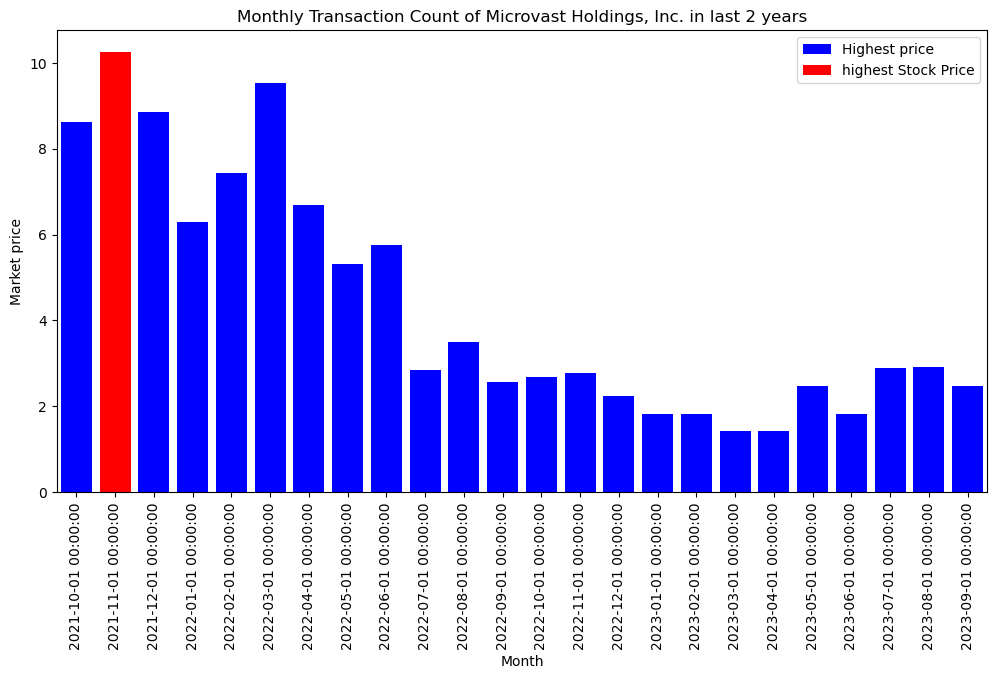

In [265]:
# Use visulizedDataLow function for get the highest price from data. 
visulizedDataHigh('Microvast Holdings, Inc.',MVST)

In [263]:
MVST_low = MVST.sort_values(by='high', ascending=False)
print(MVST_low.head())
print( "Lowest price for Microvas is: ",MVST_low.low[-1])

             open    high    low  close  adjclose    volume ticker
2021-11-01  9.226  10.250  8.000   8.49      8.49  30442000   MVST
2022-03-01  7.140   9.540  6.310   6.70      6.70  38763200   MVST
2021-12-01  8.550   8.850  5.505   5.66      5.66  29581800   MVST
2021-10-01  8.270   8.620  7.380   8.46      8.46  33419700   MVST
2022-02-01  5.600   7.425  5.430   7.14      7.14  14822300   MVST
Lowest price for Microvas is:  0.8799999952316284


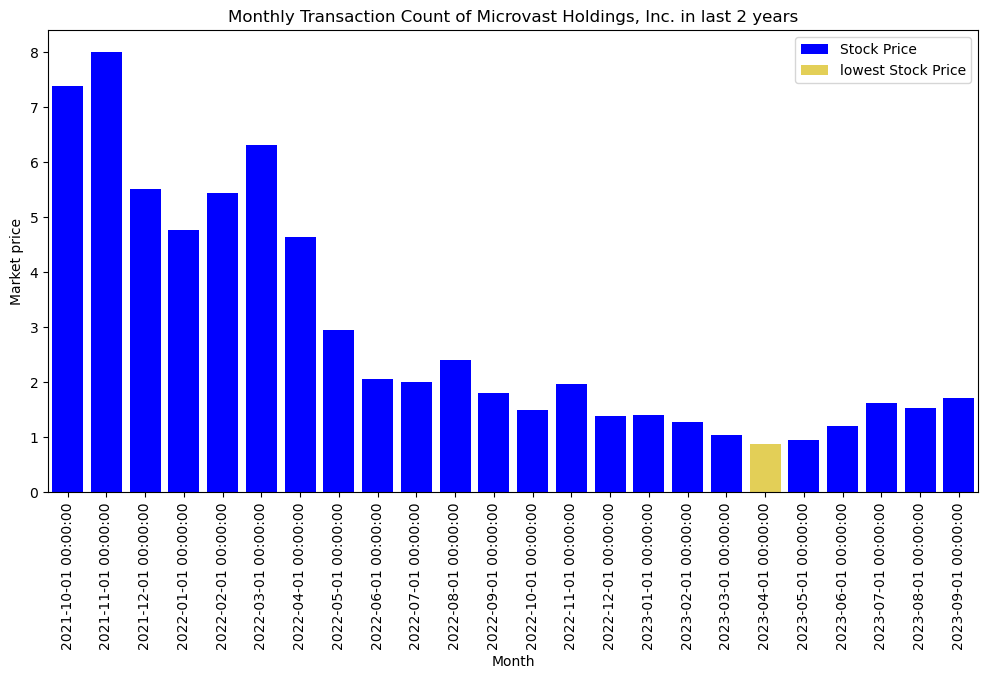

In [266]:
# Use visulizedDataLow function for get the lowest price from data. 
visulizedDataLow('Microvast Holdings, Inc.',MVST)

The correlation coefficient between volume and close is -0.39.


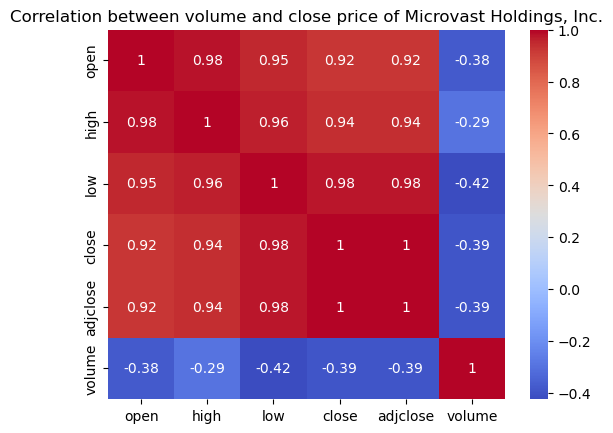

In [268]:
# Correlation between between voume and close price.
findCorr('Microvast Holdings, Inc.',MVST)

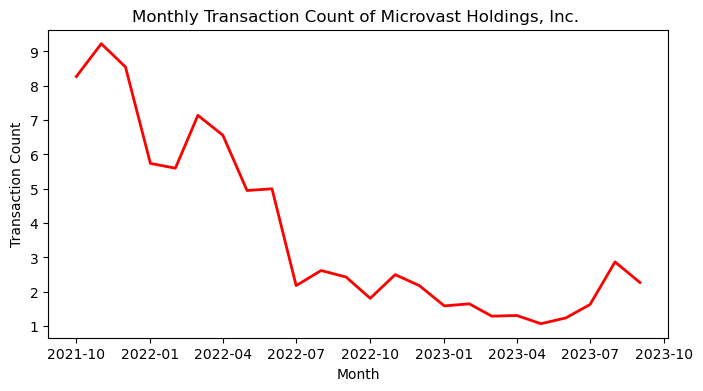

In [269]:
# get transactions History from data set.
transactionsHistory('Microvast Holdings, Inc.',MVST)

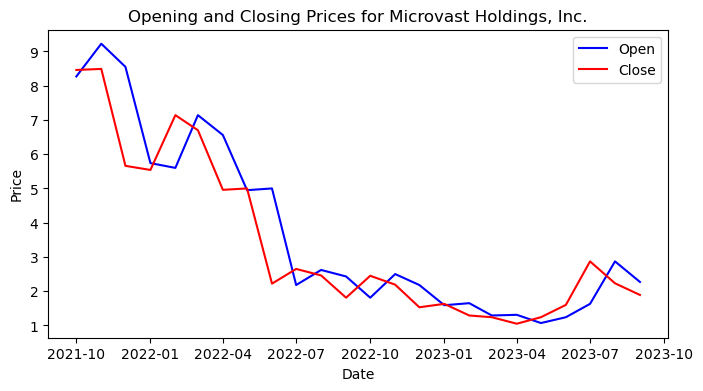

The correlation coefficient between opening and closing prices is 0.92.


In [270]:
# Correlation between between open and close price.
openClose('Microvast Holdings, Inc.',MVST)